<a href="https://colab.research.google.com/github/PolinaZamaldinova/Polina-s/blob/main/DTP_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel('dtp_good_vo_eject.xlsx')

# **Определим распределение числа ДТП по типам дорог, по видам ДТП.** 

Построим столбчатую диаграмму числа ДТП по типам дорог

<Axes: title={'center': 'ДТП по типам дорог'}>

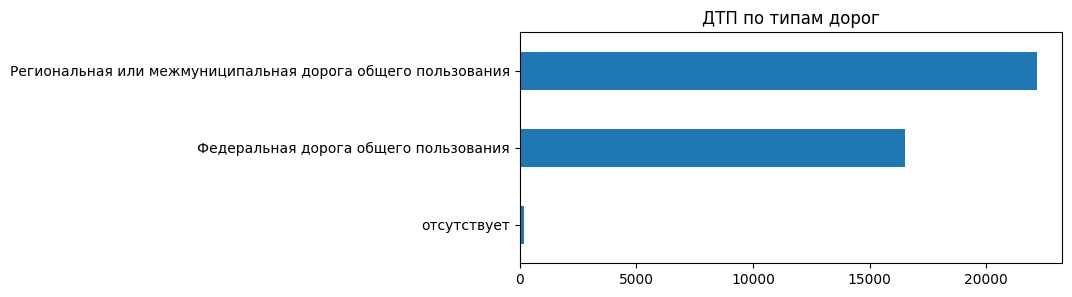

In [5]:
dtp_road = data['road_type'].value_counts().sort_values(ascending=True)
dtp_road.tail(10).plot(kind='barh',
                      figsize=(7, 3),
                      title='ДТП по типам дорог',
                      legend=False)

Построим столбчатую диаграмму числа ДТП по видам ДТП, оставив топ-5.

In [6]:
dtp_type = data['crash_type_name'].value_counts().sort_values(ascending=True)

<Axes: title={'center': 'ДТП по типам дорог'}>

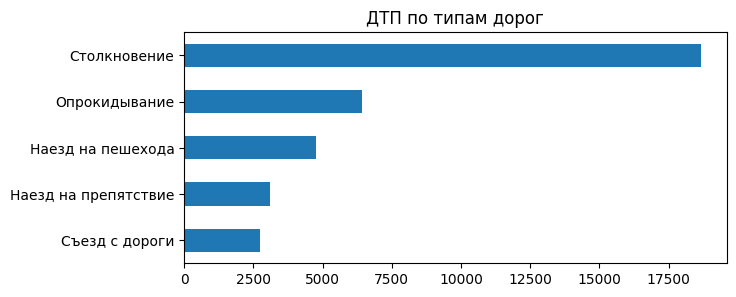

In [7]:
dtp_type.tail(5).plot(kind='barh',
                      figsize=(7, 3),
                      title='ДТП по типам дорог',
                      legend=False)

Исследуем зависимость числа ДТП от дня недели

In [ ]:
days = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']

In [ ]:
dtp_days = pd.DataFrame(data['crash_date_day'].value_counts(), index=days)
dtp_days

,crash_date_day
Понедельник,5248
Вторник,4925
Среда,4855
Четверг,4904
Пятница,5869
Суббота,6573
Воскресенье,6477


<Axes: title={'center': 'Число ДТП по дням недели'}, xlabel='Дни недели', ylabel='Число ДТП'>

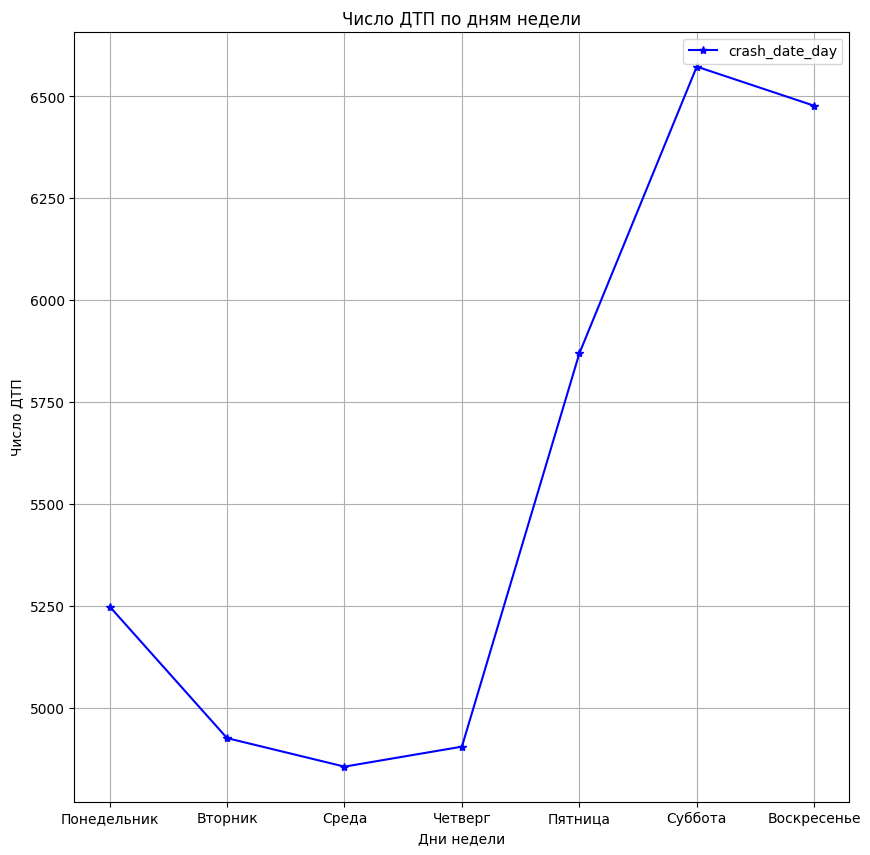

In [ ]:
dtp_days.plot(figsize=(10, 10),
              style='b*-',
              grid=True,
              title='Число ДТП по дням недели',
              xlabel='Дни недели',
              ylabel='Число ДТП')

Определим регионы с наибольшей аварийностью, числом погибших, пострадавших, участников ДТП

In [ ]:
dtp_mean = data.groupby(['region_name'])[['fatalities_amount', 'victims_amount', 'vehicles_amount', 'participants_amount']].mean()
dtp_mean.reset_index()

,region_name,fatalities_amount,victims_amount,vehicles_amount,participants_amount
0,Алтайский край,1.591171,0.199616,1.690979,4.420345
1,Амурская область,1.581940,0.230769,1.454849,5.030100
2,Архангельская область,1.549872,0.161125,1.590793,4.700767
3,Астраханская область,1.691120,0.212355,1.598456,4.505792
4,Белгородская область,1.487288,0.254237,1.822034,3.953390
...,...,...,...,...,...
78,Челябинская область,1.534694,0.247619,1.767347,4.583673
79,Чеченская Республика,1.666667,0.437500,1.625000,3.802083
80,Чувашская Республика — Чувашия,1.615169,0.241573,1.752809,4.103933
81,Ямало-Ненецкий автономный округ,1.588235,0.164706,1.717647,4.858824


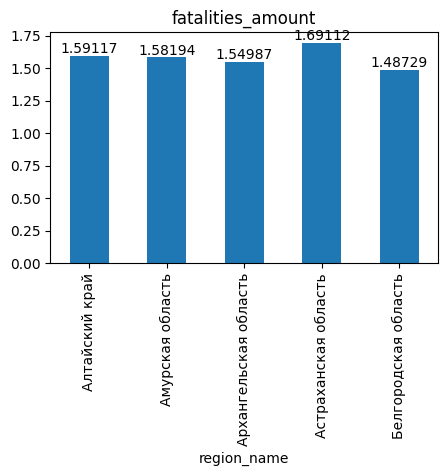

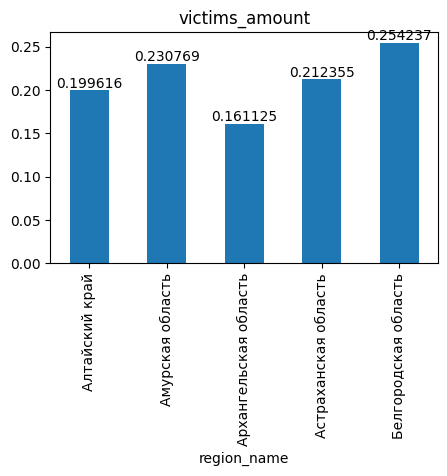

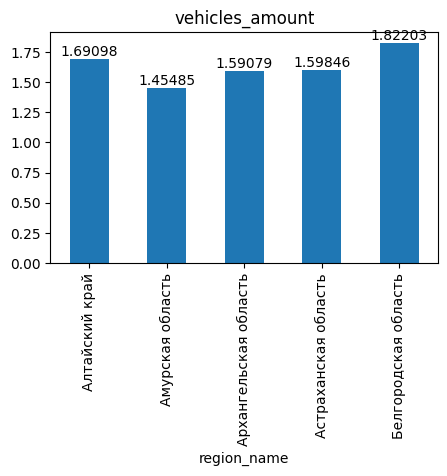

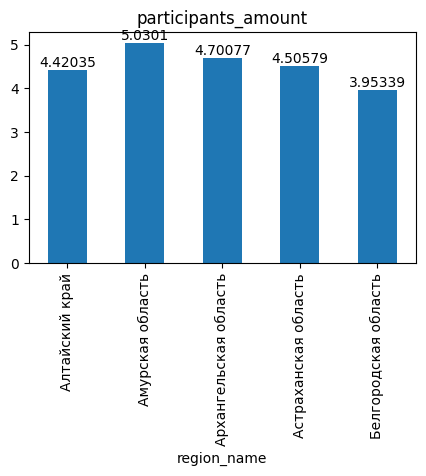

In [ ]:
for col in dtp_mean.columns:
    title = col
    ax = dtp_mean[col].head().plot(kind='bar', x='region_name', y=title, title=col, figsize=(5, 3))
    ax.bar_label(ax.containers[0])
    plt.show()

Для удобства можно добавить заголовки к графикам

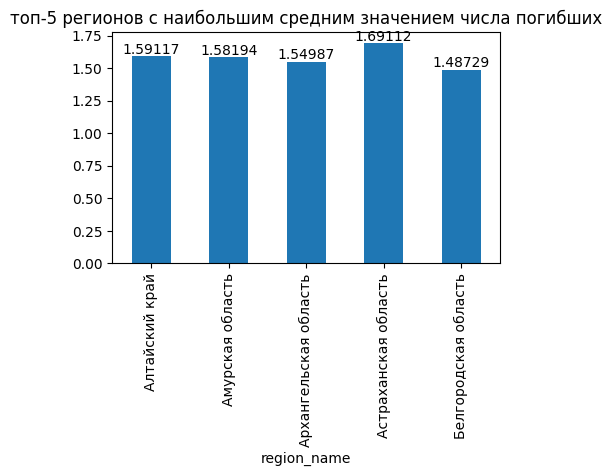

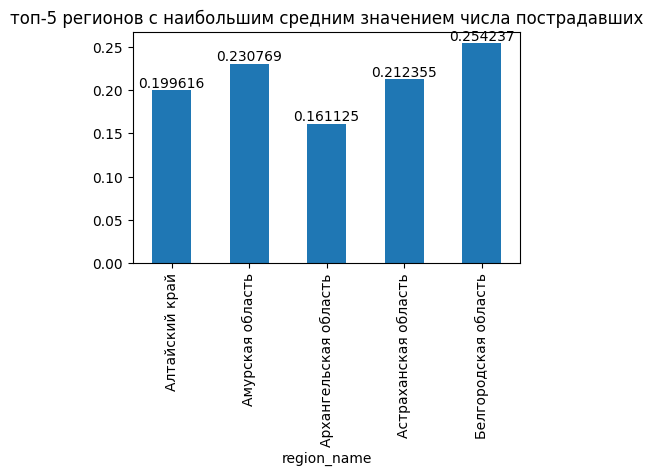

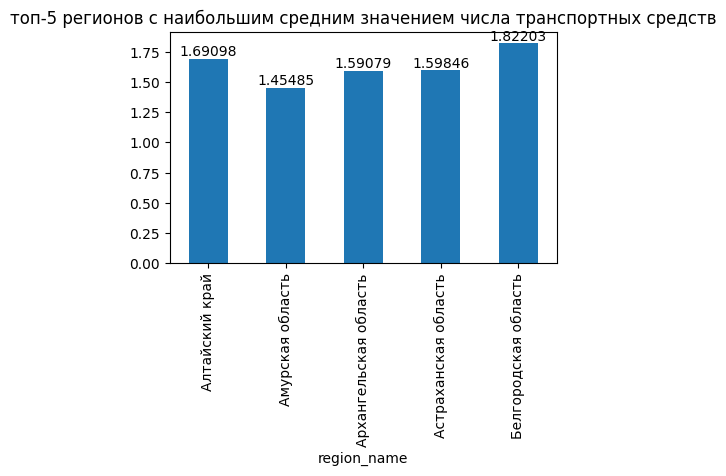

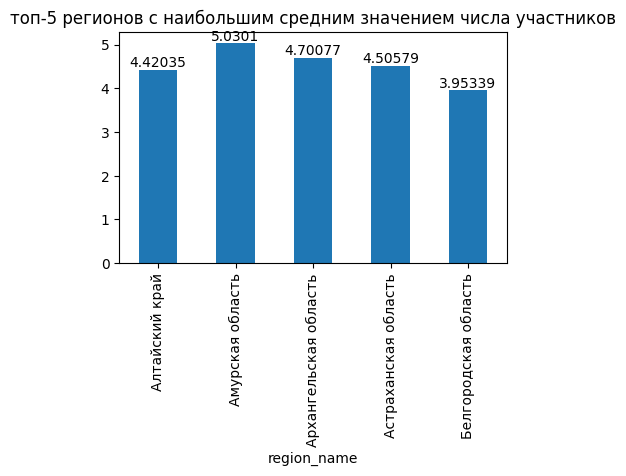

In [ ]:
titles = {'fatalities_amount': 'топ-5 регионов с наибольшим средним значением числа погибших',
         'victims_amount': 'топ-5 регионов с наибольшим средним значением числа пострадавших',
         'vehicles_amount': 'топ-5 регионов с наибольшим средним значением числа транспортных средств',
         'participants_amount': 'топ-5 регионов с наибольшим средним значением числа участников'}

for col in dtp_mean.columns:
    title = titles[col]
    ax = dtp_mean[col].head().plot(kind='bar', x='region_name', y=title, title=title, figsize=(5, 3))
    ax.bar_label(ax.containers[0])
    plt.show()

# **Исследуем время ожидания сотрудников ДПС**

Построим гистограмму времени ожидания ДПС

<Axes: >

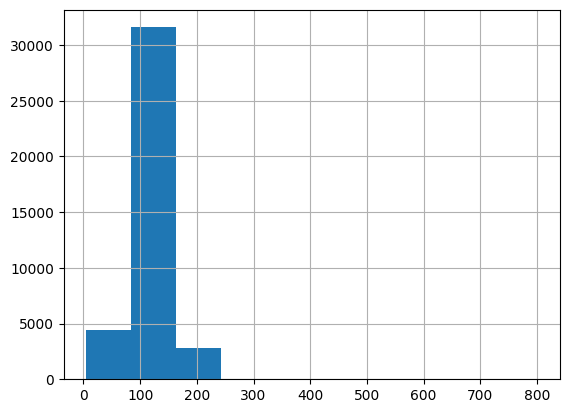

In [9]:
data['wait_time'].hist()

Ограничим график по оси x, указываем диапазон range=(min, max)

<Axes: >

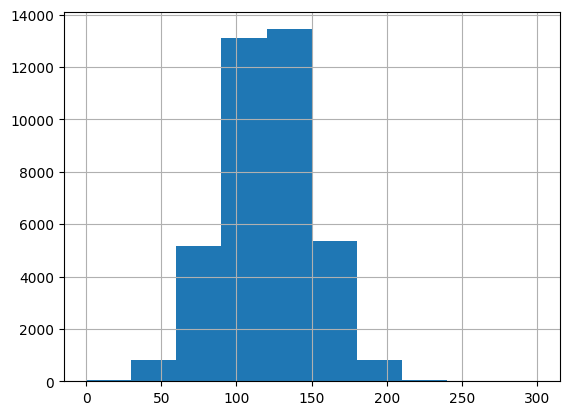

In [10]:
data['wait_time'].hist(range=(0, 300))

Гистограмма похожа на нормальное распределение, теперь это лучше видно. На первой гистограмме мы видели ось вплоть до 800 значений, но не видели значений. Что это означает? Возможно, присутствуют единичные значения в указанном диапазоне. Посторим другой график - точечную диаграмму.
Для ее построения указывается тип графика kind='scatter'

<Axes: xlabel='region_name', ylabel='wait_time'>

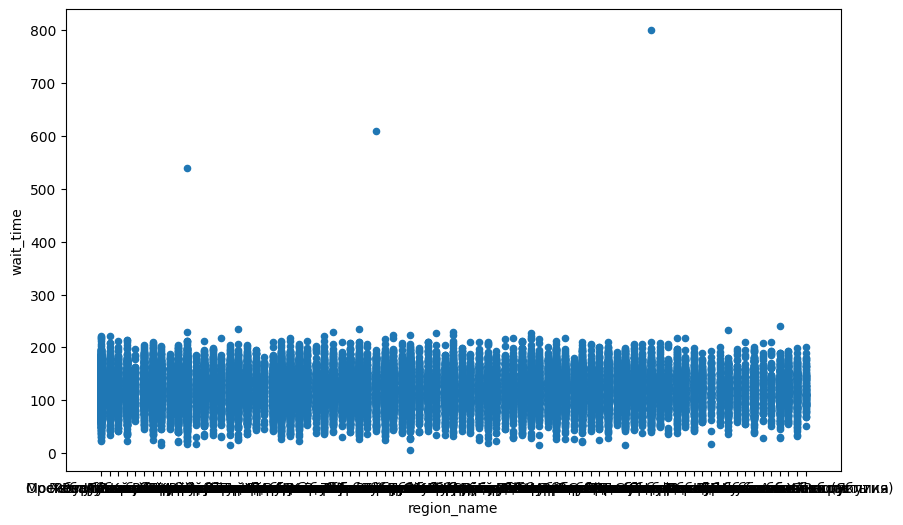

In [11]:
data.plot(kind='scatter',
          y='wait_time',
          x='region_name',
          figsize=(10, 6))

**Определить регионы с максимальным отклонением среднего времени ожидания от среднего времени ожидания по стране.**

In [14]:
data_grouped = data.groupby('region_name')['wait_time'].agg(['mean'])
data_grouped.reset_index(inplace=True)
country_mean = data['wait_time'].mean()
data_grouped['country_mean'] = country_mean
data_grouped['difference'] = abs(data_grouped['mean'] - data_grouped['country_mean'])
data_grouped[data_grouped['difference'] == data_grouped['difference'].max()]

,region_name,mean,country_mean,difference
57,Республика Тыва,115.39826,120.401003,5.002743


*Построим гистограмму*

<Axes: >

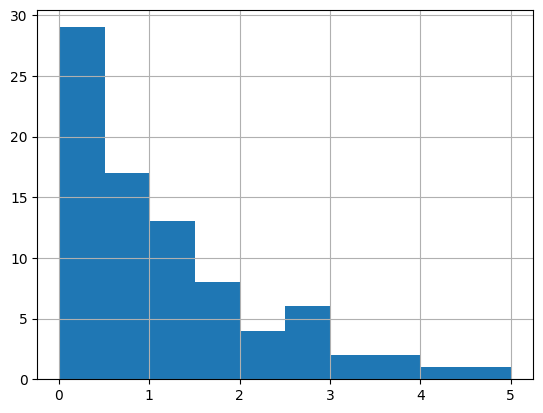

In [15]:
data_grouped['difference'].hist()

*графически можем убедиться, что максимальное отклонение действительно примерно равно 4,8*

**Построим столбчатые диаграммы**

<Axes: xlabel='region_name'>

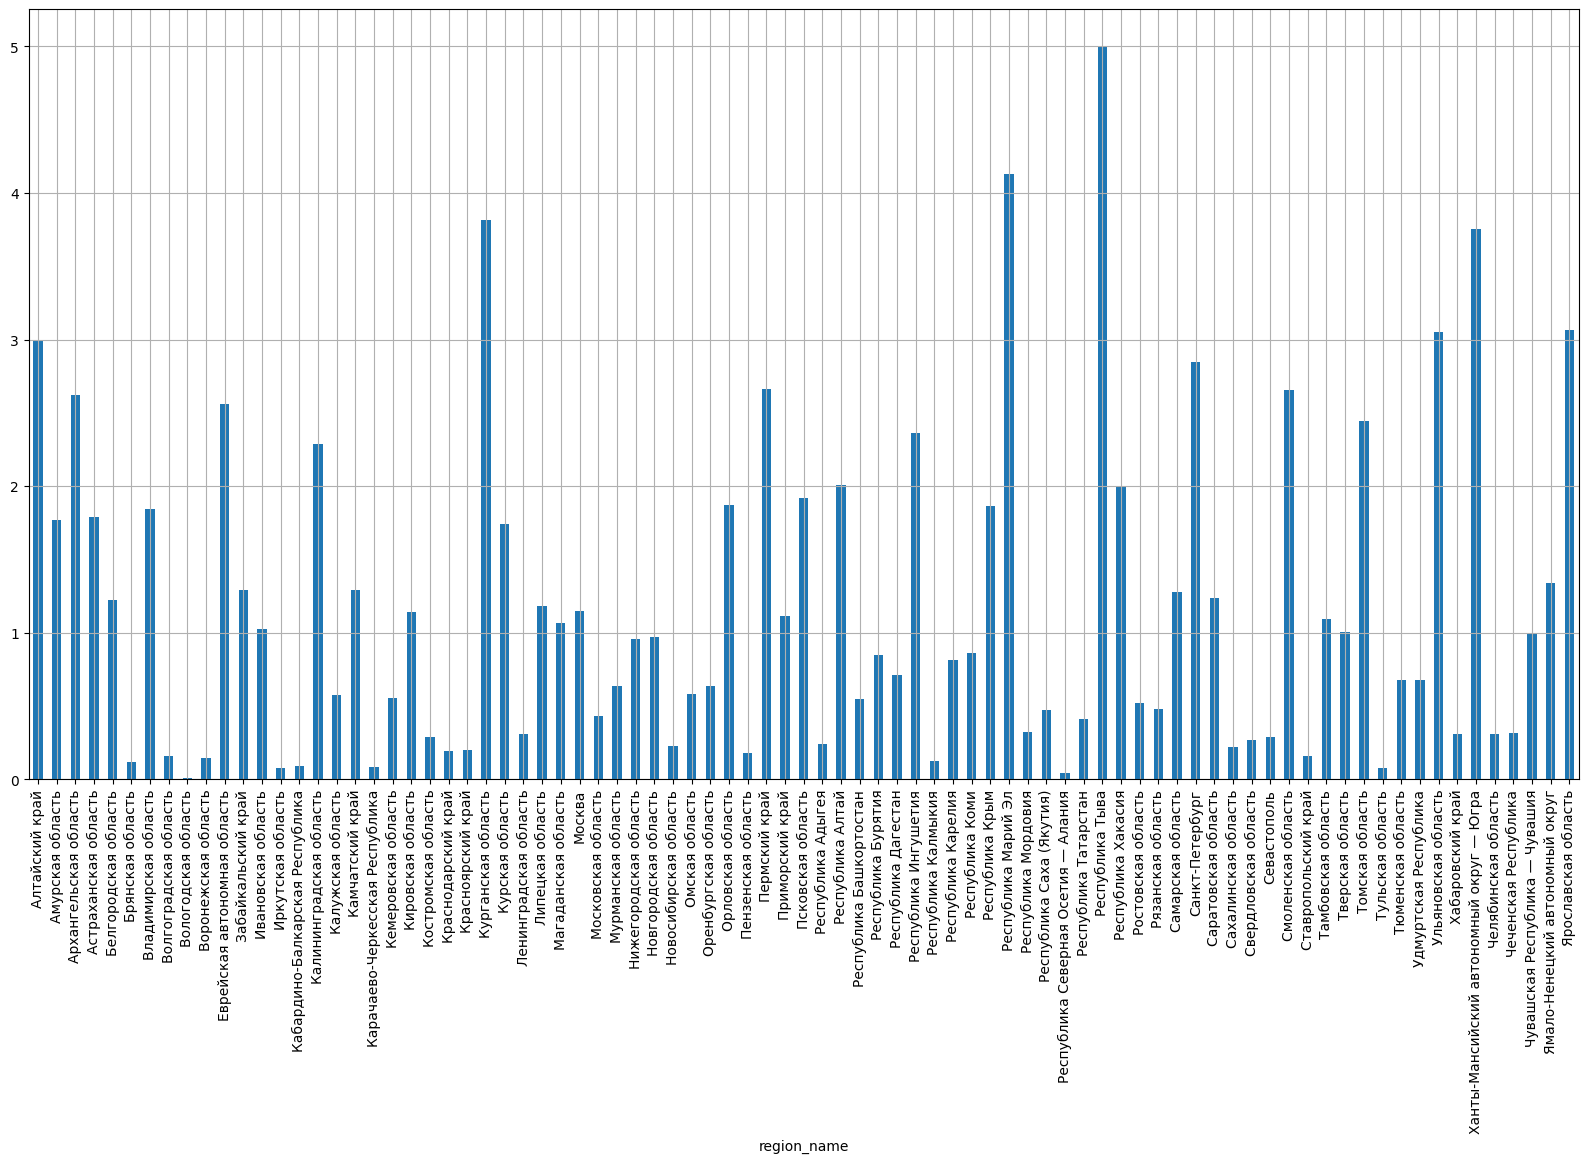

In [17]:
data_grouped.plot(kind='bar',
                   y='difference',
                   x='region_name',
                   figsize=(20, 10),
                   legend=False,
                   grid=True)

# **Исследование числа участников ДТП**

построим гистограмму 'participants_amount'

<Axes: >

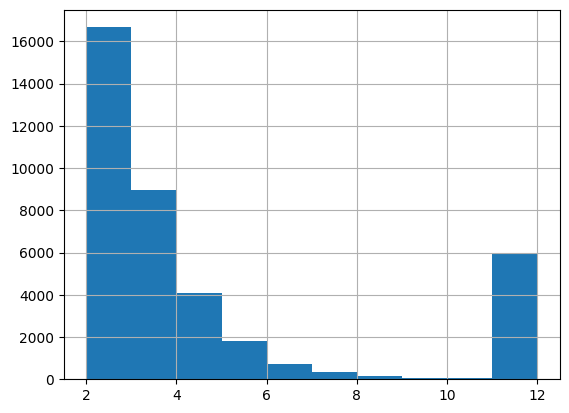

In [18]:
data['participants_amount'].hist()

Больше всего встречается участников ДТП от 2 до 10 человек

*Добавим границы интервала с помощью параметра range=(min, max)*

<Axes: >

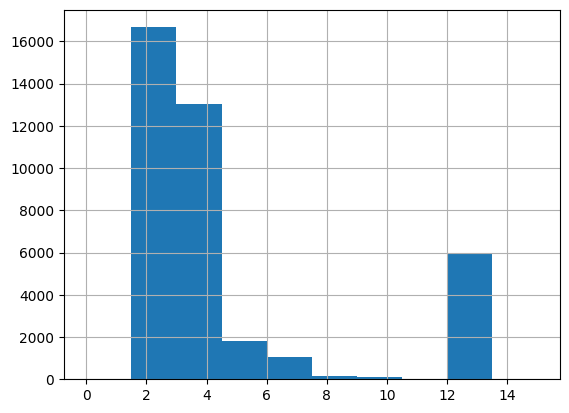

In [19]:
data['participants_amount'].hist(range=(0, 15)) 

Чаще всего 3 участника ДТП
В данных есть 6 тыс ситуаций, в которых число участников дтп = 12 - странно

*Построим точечную диаграмму*

<Axes: xlabel='region_name', ylabel='participants_amount'>

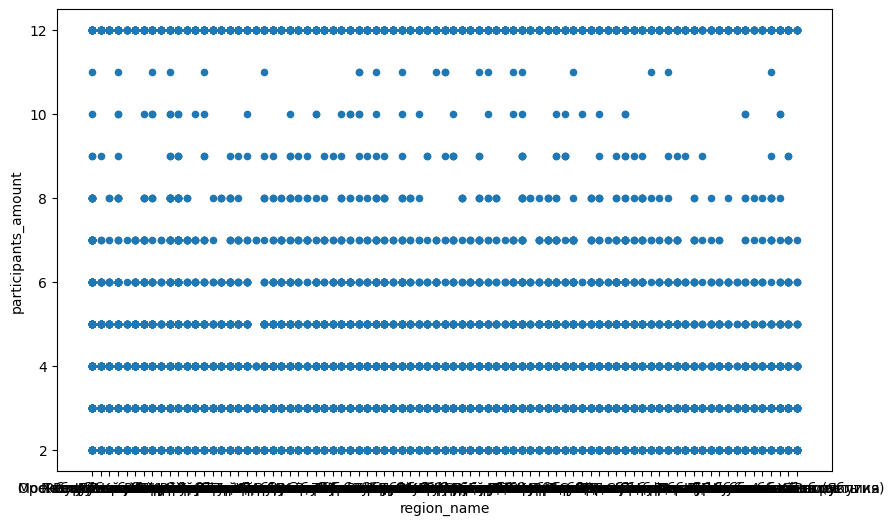

In [20]:
data.plot(kind='scatter',
          y='participants_amount',
          x='region_name',
          figsize=(10, 6))

Постоим график boxplot

<Axes: >

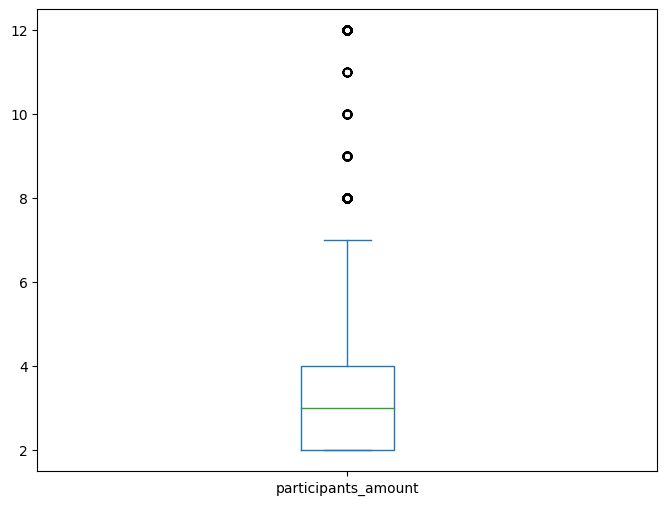

In [21]:
data['participants_amount'].plot(kind='box', figsize=(8, 6)) 

 *Скорректируем ось y*

<Axes: >

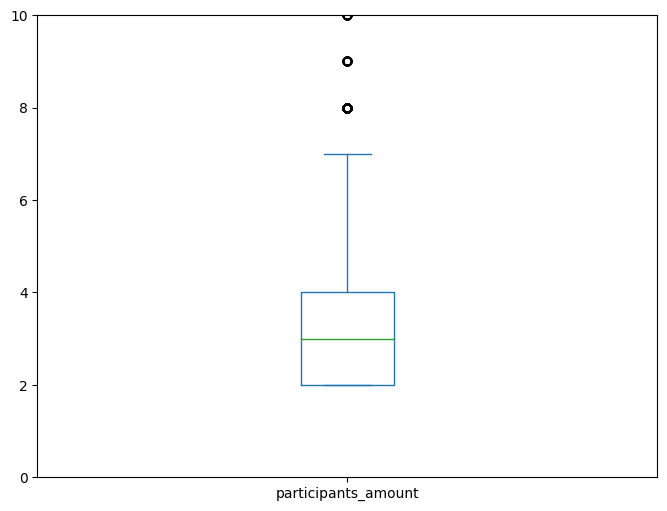

In [22]:
data['participants_amount'].plot(kind='box',
                       figsize=(8, 6),
                       ylim=(0, 10)
                      )

Теперь хорошо виден сам ящик. Какие выводы мы можем сделать?

Медиана = 3

25-й перцентиль = 2

75-й перцентиль = 4

IQR = 2

Выбросы > 7


Для столбцов 'fatalities_amount','vehicles_amount','vehicles_amount' построим диаграммы размаха, определить экстремальные выбросы. Реализуем в цикле.

Для столбца 'fatalities_amount' найдено 39 (0.10%) экстремальных значений


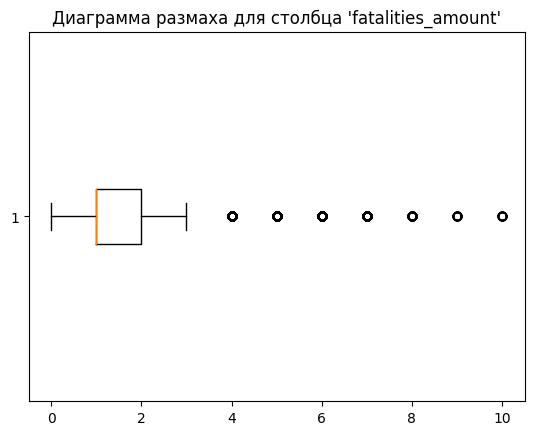

Для столбца 'vehicles_amount' найдено 0 (0.00%) экстремальных значений


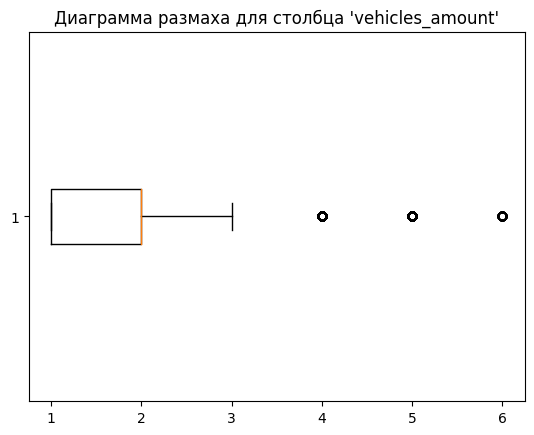

In [29]:
columns_to_plot = ['fatalities_amount', 'vehicles_amount']
for column in columns_to_plot:
    percentile = np.percentile(data[column], 99.9)
    outliers = data[data[column] > percentile][column]
    num_outliers = len(outliers)
    percent_outliers = num_outliers / len(data) * 100
    print(f"Для столбца '{column}' найдено {num_outliers} ({percent_outliers:.2f}%) экстремальных значений")
    fig, ax = plt.subplots()
    ax.boxplot(data[column], vert=False)
    ax.set_title(f"Диаграмма размаха для столбца '{column}'")
    plt.show()

*Достаточно маленький процент выбросов позволяет избавиться от них*

Сформируем срез данных с условием road_code = М-10

In [30]:
data[data['road_code'] == 'М-10']

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time
82,41,Ленинградская область,М-10,"""Россия"" Москва - Тверь - Великий Новгород - С...",Федеральная дорога общего пользования,"СЗФО, Ленинградская область, Тосненский район",Столкновение,20181231,12:00:00,Нарушение правил перестроения,1,0,2,2,2018-12-31 12:00:00,Понедельник,97.087759
102,41,Ленинградская область,М-10,Подъезд к г. Тосно и проезд по г. Тосно от 637...,Федеральная дорога общего пользования,"СЗФО, Ленинградская область, Тосненский район,...",Столкновение,20181231,9:20:00,Несоблюдение очередности проезда,3,0,2,4,2018-12-31 09:20:00,Понедельник,126.964115
131,45,Москва,М-10,"""Россия"" Москва - Тверь - Великий Новгород - С...",Федеральная дорога общего пользования,"ЦФО, Москва, Центральный АО, Тверской",Наезд на пешехода,20181231,1:05:00,Переход через проезжую часть вне пешеходного п...,0,1,1,2,2018-12-31 01:05:00,Понедельник,102.940665
153,41,Ленинградская область,М-10,Подъезд к г. Тосно и проезд по г. Тосно от 637...,Федеральная дорога общего пользования,"СЗФО, Ленинградская область, Тосненский район",Столкновение,20181230,20:47:00,"Выезд на полосу встречного движения в местах, ...",5,0,2,4,2018-12-30 20:47:00,Воскресенье,60.278121
173,49,Новгородская область,М-10,"""Россия"" Москва - Тверь - Великий Новгород - С...",Федеральная дорога общего пользования,"СЗФО, Новгородская область, Чудовский район",Наезд на препятствие,20181230,18:45:00,Нарушение правил расположения ТС на проезжей ч...,1,0,1,12,2018-12-30 18:45:00,Воскресенье,158.201097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38496,28,Тверская область,М-10,"""Россия"" Москва - Тверь - Великий Новгород - С...",Федеральная дорога общего пользования,"ЦФО, Тверская область, Калининский район",Столкновение,20180405,20:04:00,Неправильный выбор дистанции,0,1,5,3,2018-04-05 20:04:00,Четверг,104.043450
38582,28,Тверская область,М-10,"""Россия"" Москва - Тверь - Великий Новгород - С...",Федеральная дорога общего пользования,"ЦФО, Тверская область, Калининский район",Столкновение,20180404,15:04:00,"Неправильный выбор дистанции, Другие нарушения...",2,0,2,3,2018-04-04 15:04:00,Среда,124.272670
38694,49,Новгородская область,М-10,"""Россия"" Москва - Тверь - Великий Новгород - С...",Федеральная дорога общего пользования,"СЗФО, Новгородская область, Крестецкий район",Столкновение,20180402,22:05:00,Несоблюдение очередности проезда,1,0,2,3,2018-04-02 22:05:00,Понедельник,87.740655
38728,41,Ленинградская область,М-10,Подъезд к г. Тосно и проезд по г. Тосно от 637...,Федеральная дорога общего пользования,"СЗФО, Ленинградская область, Тосненский район",Наезд на препятствие,20180402,12:25:00,Несоответствие скорости конкретным условиям дв...,1,0,1,12,2018-04-02 12:25:00,Понедельник,146.315752


Сформируем срез данных с двумя условиями: road_code = М-10 и crash_type_name = Столкновение

In [31]:
data[(data['road_code'] == 'М-10') & (data['crash_type_name'] == 'Столкновение')]

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time
82,41,Ленинградская область,М-10,"""Россия"" Москва - Тверь - Великий Новгород - С...",Федеральная дорога общего пользования,"СЗФО, Ленинградская область, Тосненский район",Столкновение,20181231,12:00:00,Нарушение правил перестроения,1,0,2,2,2018-12-31 12:00:00,Понедельник,97.087759
102,41,Ленинградская область,М-10,Подъезд к г. Тосно и проезд по г. Тосно от 637...,Федеральная дорога общего пользования,"СЗФО, Ленинградская область, Тосненский район,...",Столкновение,20181231,9:20:00,Несоблюдение очередности проезда,3,0,2,4,2018-12-31 09:20:00,Понедельник,126.964115
153,41,Ленинградская область,М-10,Подъезд к г. Тосно и проезд по г. Тосно от 637...,Федеральная дорога общего пользования,"СЗФО, Ленинградская область, Тосненский район",Столкновение,20181230,20:47:00,"Выезд на полосу встречного движения в местах, ...",5,0,2,4,2018-12-30 20:47:00,Воскресенье,60.278121
394,28,Тверская область,М-10,"""Россия"" Москва - Тверь - Великий Новгород - С...",Федеральная дорога общего пользования,"ЦФО, Тверская область, Вышневолоцкий район",Столкновение,20181229,18:00:00,Неправильный выбор дистанции,1,0,2,2,2018-12-29 18:00:00,Суббота,106.822547
457,28,Тверская область,М-10,"""Россия"" Москва - Тверь - Великий Новгород - С...",Федеральная дорога общего пользования,"ЦФО, Тверская область, Конаковский район",Столкновение,20181229,12:20:00,Другие нарушения ПДД водителями,0,1,3,2,2018-12-29 12:20:00,Суббота,142.151539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38269,45,Москва,М-10,"""Россия"" Москва - Тверь - Великий Новгород - С...",Федеральная дорога общего пользования,"ЦФО, Москва, Северный АО, Головинский",Столкновение,20180408,5:50:00,Неправильный выбор дистанции,1,0,2,3,2018-04-08 05:50:00,Воскресенье,140.317589
38496,28,Тверская область,М-10,"""Россия"" Москва - Тверь - Великий Новгород - С...",Федеральная дорога общего пользования,"ЦФО, Тверская область, Калининский район",Столкновение,20180405,20:04:00,Неправильный выбор дистанции,0,1,5,3,2018-04-05 20:04:00,Четверг,104.043450
38582,28,Тверская область,М-10,"""Россия"" Москва - Тверь - Великий Новгород - С...",Федеральная дорога общего пользования,"ЦФО, Тверская область, Калининский район",Столкновение,20180404,15:04:00,"Неправильный выбор дистанции, Другие нарушения...",2,0,2,3,2018-04-04 15:04:00,Среда,124.272670
38694,49,Новгородская область,М-10,"""Россия"" Москва - Тверь - Великий Новгород - С...",Федеральная дорога общего пользования,"СЗФО, Новгородская область, Крестецкий район",Столкновение,20180402,22:05:00,Несоблюдение очередности проезда,1,0,2,3,2018-04-02 22:05:00,Понедельник,87.740655


Добавьте к п. 2 условие: не в понедельник


In [32]:
data[(data['road_code'] == 'М-10') & (data['crash_type_name'] == 'Столкновение') & (~(data['crash_date_day'] == 'Понедельник'))]

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time
153,41,Ленинградская область,М-10,Подъезд к г. Тосно и проезд по г. Тосно от 637...,Федеральная дорога общего пользования,"СЗФО, Ленинградская область, Тосненский район",Столкновение,20181230,20:47:00,"Выезд на полосу встречного движения в местах, ...",5,0,2,4,2018-12-30 20:47:00,Воскресенье,60.278121
394,28,Тверская область,М-10,"""Россия"" Москва - Тверь - Великий Новгород - С...",Федеральная дорога общего пользования,"ЦФО, Тверская область, Вышневолоцкий район",Столкновение,20181229,18:00:00,Неправильный выбор дистанции,1,0,2,2,2018-12-29 18:00:00,Суббота,106.822547
457,28,Тверская область,М-10,"""Россия"" Москва - Тверь - Великий Новгород - С...",Федеральная дорога общего пользования,"ЦФО, Тверская область, Конаковский район",Столкновение,20181229,12:20:00,Другие нарушения ПДД водителями,0,1,3,2,2018-12-29 12:20:00,Суббота,142.151539
958,28,Тверская область,М-10,"""Россия"" Москва - Тверь - Великий Новгород - С...",Федеральная дорога общего пользования,"ЦФО, Тверская область, Бологовский район",Столкновение,20181226,17:55:00,Несоблюдение очередности проезда,1,0,3,2,2018-12-26 17:55:00,Среда,103.416035
1477,41,Ленинградская область,М-10,"""Россия"" Москва - Тверь - Великий Новгород - С...",Федеральная дорога общего пользования,"СЗФО, Ленинградская область, Тосненский район,...",Столкновение,20181223,16:15:00,Несоответствие скорости конкретным условиям дв...,4,0,3,5,2018-12-23 16:15:00,Воскресенье,145.807026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38233,49,Новгородская область,М-10,"""Россия"" Москва - Тверь - Великий Новгород - С...",Федеральная дорога общего пользования,"СЗФО, Новгородская область, Валдайский район",Столкновение,20180408,15:40:00,Выезд на полосу встречного движения,2,0,2,2,2018-04-08 15:40:00,Воскресенье,110.241099
38247,41,Ленинградская область,М-10,"""Россия"" Москва - Тверь - Великий Новгород - С...",Федеральная дорога общего пользования,"СЗФО, Ленинградская область, Тосненский район",Столкновение,20180408,12:10:00,Неправильный выбор дистанции,4,0,5,5,2018-04-08 12:10:00,Воскресенье,136.418448
38269,45,Москва,М-10,"""Россия"" Москва - Тверь - Великий Новгород - С...",Федеральная дорога общего пользования,"ЦФО, Москва, Северный АО, Головинский",Столкновение,20180408,5:50:00,Неправильный выбор дистанции,1,0,2,3,2018-04-08 05:50:00,Воскресенье,140.317589
38496,28,Тверская область,М-10,"""Россия"" Москва - Тверь - Великий Новгород - С...",Федеральная дорога общего пользования,"ЦФО, Тверская область, Калининский район",Столкновение,20180405,20:04:00,Неправильный выбор дистанции,0,1,5,3,2018-04-05 20:04:00,Четверг,104.043450


Сформируйте срез данных в промежутке времени crash_time от 20 до 21 часа.

In [33]:
data['crash_time'] = pd.to_datetime(data['crash_time'], format= '%H:%M:%S')
data['hour'] = pd.DatetimeIndex(data['crash_time']).hour
data[(data['hour'] == 20) ]


,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time,hour
13,3,Краснодарский край,отсутствует,г.Армавир-с.Успенское-г.Невинномысск,Региональная или межмуниципальная дорога общег...,"ЮФО, Краснодарский край, Успенский район, Коно...",Столкновение,20181231,1900-01-01 20:59:00,Несоблюдение очередности проезда,1,0,2,2,2018-12-31 20:59:00,Понедельник,128.082009,20
14,93,Республика Тыва,отсутствует,Подъезд к с. Кара-Хаак,Региональная или межмуниципальная дорога общег...,"СФО, Республика Тыва, Кызыл",Столкновение,20181231,1900-01-01 20:50:00,Неправильный выбор дистанции,1,0,3,2,2018-12-31 20:50:00,Понедельник,85.957318,20
15,57,Пермский край,Р-242,Пермь - Екатеринбург,Федеральная дорога общего пользования,"ПФО, Пермский край, Суксунский район",Столкновение,20181231,1900-01-01 20:40:00,Несоответствие скорости конкретным условиям дв...,4,2,3,5,2018-12-31 20:40:00,Понедельник,143.130997,20
16,97,Чувашская Республика — Чувашия,отсутствует,"""Аликово-Старые Атаи-а/д """"Сура""""""",Региональная или межмуниципальная дорога общег...,"ПФО, Чувашская Республика - Чувашия, Аликовски...",Столкновение,20181231,1900-01-01 20:35:00,Неправильный выбор дистанции,1,0,2,2,2018-12-31 20:35:00,Понедельник,116.500310,20
17,30,Камчатский край,отсутствует,г.П-Камчатский - с.Мильково,Региональная или межмуниципальная дорога общег...,"ДФО, Камчатский край, Елизовский район",Столкновение,20181231,1900-01-01 20:18:00,Неправильный выбор дистанции,2,0,2,3,2018-12-31 20:18:00,Понедельник,95.288870,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38778,19,Вологодская область,А-119,Вологда - Медвежьегорск - автомобильная дорога...,Федеральная дорога общего пользования,"СЗФО, Вологодская область, Вытегорский район, ...",Отбрасывание предмета(отсоединение колеса),20180401,1900-01-01 20:20:00,Несоответствие скорости конкретным условиям дв...,1,0,3,2,2018-04-01 20:20:00,Воскресенье,121.589990,20
38779,7,Ставропольский край,отсутствует,Ставрополь - Изобильный - Новоалександровск - ...,Региональная или межмуниципальная дорога общег...,"СКФО, Ставропольский край, Изобильненский район",Столкновение,20180401,1900-01-01 20:20:00,Выезд на полосу встречного движения,7,3,2,7,2018-04-01 20:20:00,Воскресенье,126.770938,20
38780,80,Республика Башкортостан,Р-240,Уфа - Оренбург (основное направление),Федеральная дорога общего пользования,"ПФО, Республика Башкортостан, Аургазинский район",Столкновение,20180401,1900-01-01 20:00:00,Нарушение правил расположения ТС на проезжей ч...,1,0,2,3,2018-04-01 20:00:00,Воскресенье,130.115275,20
38781,7,Ставропольский край,отсутствует,Ставрополь - Изобильный - Новоалександровск - ...,Региональная или межмуниципальная дорога общег...,"СКФО, Ставропольский край, Шпаковский район",Наезд на пешехода,20180401,1900-01-01 20:00:00,"Несоблюдение бокового интервала, Нахождение на...",1,0,1,2,2018-04-01 20:00:00,Воскресенье,86.356290,20


# **Исследование ДТП в ночное время суток**

Определим число наездов на пешехода в московской области

In [39]:
data.query('crash_type_name == "Наезд на пешехода" and region_name == "Московская область"')

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time,hour,hours
38,46,Московская область,отсутствует,Сергиев Посад-Калязин-Рыбинск-Череповец,Региональная или межмуниципальная дорога общег...,"ЦФО, Московская область, Сергиево-Посадский ра...",Наезд на пешехода,20181231,1900-01-01 17:45:00,Нарушение правил проезда пешеходного перехода,1,0,1,2,2018-12-31 17:45:00,Понедельник,146.043722,17,17
84,46,Московская область,М-8,"""Холмогоры"" Москва - Ярославль - Вологда – Арх...",Федеральная дорога общего пользования,"ЦФО, Московская область, Пушкинский район",Наезд на пешехода,20181231,1900-01-01 11:55:00,Переход через проезжую часть вне пешеходного п...,1,0,1,2,2018-12-31 11:55:00,Понедельник,93.721356,11,11
509,46,Московская область,М-7,"""Волга"" Москва - Владимир - Нижний Новгород - ...",Федеральная дорога общего пользования,"ЦФО, Московская область, Городской округ ""Бого...",Наезд на пешехода,20181229,1900-01-01 06:45:00,Переход через проезжую часть вне пешеходного п...,0,1,1,2,2018-12-29 06:45:00,Суббота,81.788535,6,6
512,46,Московская область,отсутствует,"""М10""""Россия""""-Воздвиженское-Высоковск""",Региональная или межмуниципальная дорога общег...,"ЦФО, Московская область, Клинский район",Наезд на пешехода,20181229,1900-01-01 05:30:00,Переход через проезжую часть в неустановленном...,1,0,1,2,2018-12-29 05:30:00,Суббота,129.302698,5,5
1100,46,Московская область,отсутствует,Солнечногорск-Тараканово-Попелково,Региональная или межмуниципальная дорога общег...,"ЦФО, Московская область, Солнечногорский район...",Наезд на пешехода,20181225,1900-01-01 21:15:00,Переход через проезжую часть вне пешеходного п...,1,0,1,2,2018-12-25 21:15:00,Вторник,109.089167,21,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38662,46,Московская область,отсутствует,"""Спиридово-""""А-104 """"Москва-Дмитров-Дубна""""-Дм...",Региональная или межмуниципальная дорога общег...,"ЦФО, Московская область, Дмитровский район, На...",Наезд на пешехода,20180403,1900-01-01 17:05:00,Переход через проезжую часть вне пешеходного п...,1,0,1,2,2018-04-03 17:05:00,Вторник,158.382473,17,17
38676,46,Московская область,отсутствует,Москва-Егорьевск-Тума-Касимов,Региональная или межмуниципальная дорога общег...,"ЦФО, Московская область, Раменский район, Ново...",Наезд на пешехода,20180403,1900-01-01 10:00:00,Иные нарушения ПДД пешеходом,1,0,1,2,2018-04-03 10:00:00,Вторник,70.328765,10,10
38683,46,Московская область,А-108,"""Московское большое кольцо"" Дмитров - Сергиев ...",Федеральная дорога общего пользования,"ЦФО, Московская область, Клинский район, Клин",Наезд на пешехода,20180403,1900-01-01 05:10:00,Переход через проезжую часть вне пешеходного п...,0,1,1,2,2018-04-03 05:10:00,Вторник,142.061226,5,5
38738,46,Московская область,А-105,подъездная дорога от Москвы к аэропорту Домоде...,Федеральная дорога общего пользования,"ЦФО, Московская область, Городской округ Домод...",Наезд на пешехода,20180402,1900-01-01 08:55:00,Нарушение правил проезда пешеходного перехода,1,0,1,2,2018-04-02 08:55:00,Понедельник,109.558603,8,8


Какой процент ДТП, составляют ДТП, произошедшие в ночное время суток (от 0 до 5 часов включительно).Постройте гистограмму числа ДТП по часам

<Axes: >

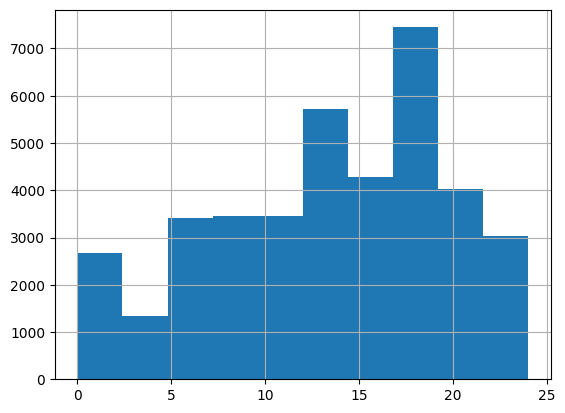

In [38]:
data['hours'] = data['datetime'].dt.hour
(data.query('hours >=0 and hours <= 5 ').count()[1]) *100 / len(data['hour'])
data['hours'].hist(range=(0, 24))

Построим гистограмму числа ДТП со смертельным исходом для столкновений по часам

<Axes: ylabel='Frequency'>

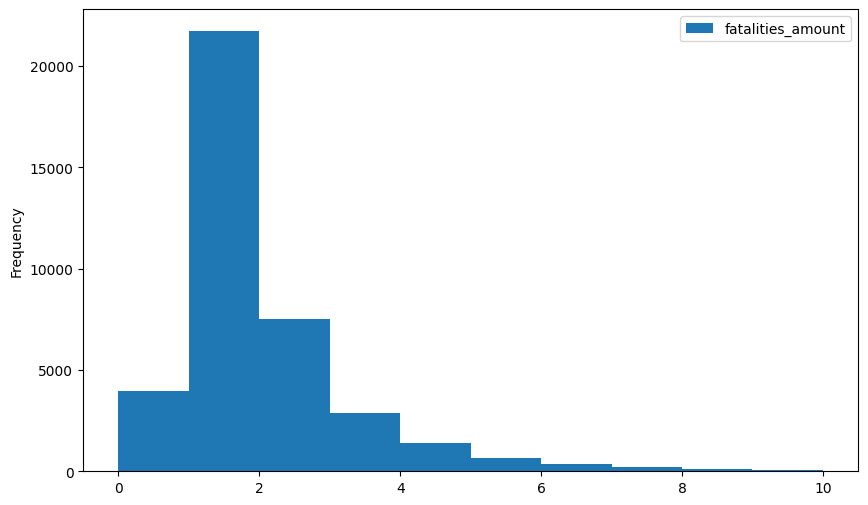

In [40]:
data.plot(kind='hist',
          y='fatalities_amount',
          x='hours',
          figsize=(10, 6)
         )

Используя срезы данных, сравним число ДТП со смертельным исходом в будни (кроме пятницы), отдельно в пятницу и в выходные дни.

In [36]:
work_days = ['Понедельник','Вторник','Среда','Четверг']
data.query('crash_date_day.isin(@work_days)')['fatalities_amount'].sum()

29591

In [35]:
rest_days = ['Суббота', 'Воскресенье']
data.query('crash_date_day.isin(@rest_days)')['fatalities_amount'].sum()

20928

In [34]:
data.query('crash_date_day == "Пятница"')['fatalities_amount'].sum()

8738

# **Определение наиболее опасных дорог**

Определим самую опасную дорогу в России (по числу погибших) (road_code) отдельно для двух разных типов дорог. (федеральной и региональной)

In [41]:
data.query('road_type == "Федеральная дорога общего пользования"').sort_values('fatalities_amount', ascending = False).head(1)

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time,hour,hours
6711,57,Пермский край,М-7,Подъезд к городу Пермь от а/д М-7,Федеральная дорога общего пользования,"ПФО, Пермский край, Краснокамский район",Столкновение,20181120,1900-01-01 08:10:00,Несоответствие скорости конкретным условиям дв...,10,0,3,10,2018-11-20 08:10:00,Вторник,97.917696,8,8


In [42]:
data.query('road_type == "Региональная или межмуниципальная дорога общего пользования"').sort_values('fatalities_amount', ascending = False).head(1)

,reg_code,region_name,road_code,road_name,road_type,address,crash_type_name,crash_date,crash_time,crash_reason,fatalities_amount,victims_amount,vehicles_amount,participants_amount,datetime,crash_date_day,wait_time,hour,hours
26361,24,Ивановская область,отсутствует,Кинешма-Юрьевец-Пучеж-Пурех,Региональная или межмуниципальная дорога общег...,"ЦФО, Ивановская область, Юрьевецкий район",Столкновение,20180707,1900-01-01 10:30:00,Несоблюдение очередности проезда,10,0,2,7,2018-07-07 10:30:00,Суббота,164.768558,10,10


Определим дорогу, которая пересекает наибольшее число регионов.

In [43]:
data.query('road_code != "отсутствует"').groupby('road_code')['reg_code'].nunique().sort_values(ascending=False).head(1)

road_code
М-5    11
Name: reg_code, dtype: int64

Определим регион с самым опасным участком дороги для найденной дороги, построим столбчатую диаграмму по числу ДТП.

In [44]:
data.query('road_code == "М-5"').groupby('region_name')['fatalities_amount'].sum().sort_values(ascending=False)

region_name
Самарская область          365
Пензенская область         274
Рязанская область          270
Челябинская область        268
Республика Башкортостан    176
Республика Мордовия        131
Оренбургская область       122
Московская область          95
Ульяновская область         86
Свердловская область        33
Республика Татарстан        24
Name: fatalities_amount, dtype: int64

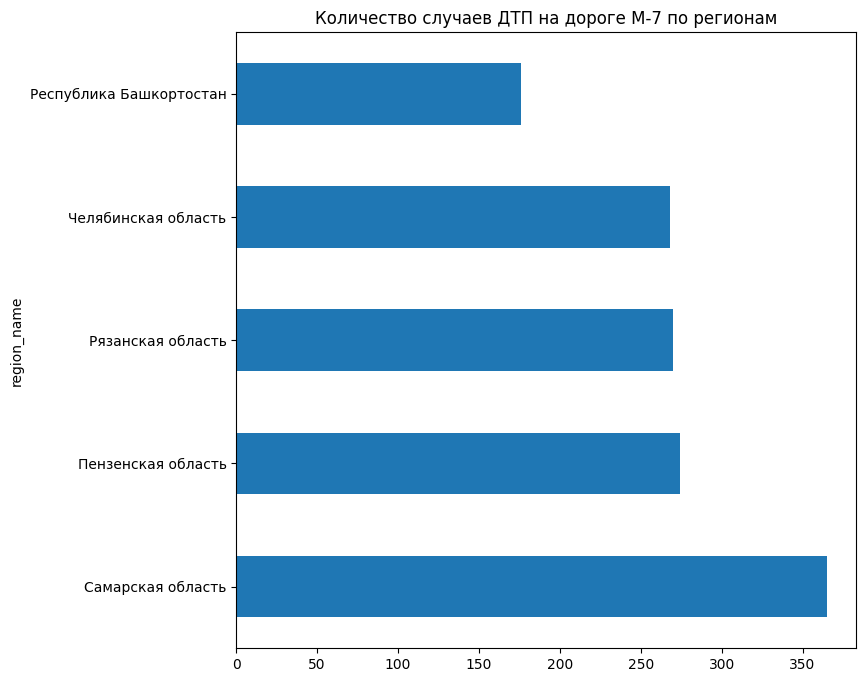

In [46]:
m5_regions = data.query('road_code == "М-5"').groupby('region_name')['fatalities_amount'].sum().sort_values(ascending=False)
m5_regions.head().plot(kind= 'barh',
                        figsize= (8,8),
                        title='Количество случаев ДТП на дороге М-7 по регионам',
                        legend=False
                       )
plt.show()

Для топ-10 дорог пересекающих разные регионы определиv суммарное число погибших, участников ДТП (participants_amount).



In [47]:
top_10_roads = data.query('road_code != "отсутствует"').groupby('road_code')['reg_code'].nunique().sort_values(ascending=False).head(10).index.tolist()
summary = data[data['road_code'].isin(top_10_roads)].groupby('road_code')[['participants_amount', 'fatalities_amount']].sum()
summary

,participants_amount,fatalities_amount
road_code,,
М-10,1903,659
М-2,1826,752
М-3,1139,426
М-4,3921,1596
М-5,4601,1844
М-7,4707,1888
М-8,1866,733
Р-217,3719,1497
Р-22,2012,813


Построим столбчатую диаграмму числа ДТП для определенных в п.1 дорог по регионам. (визуализируя только топ-10 регионов по числу ДТП)

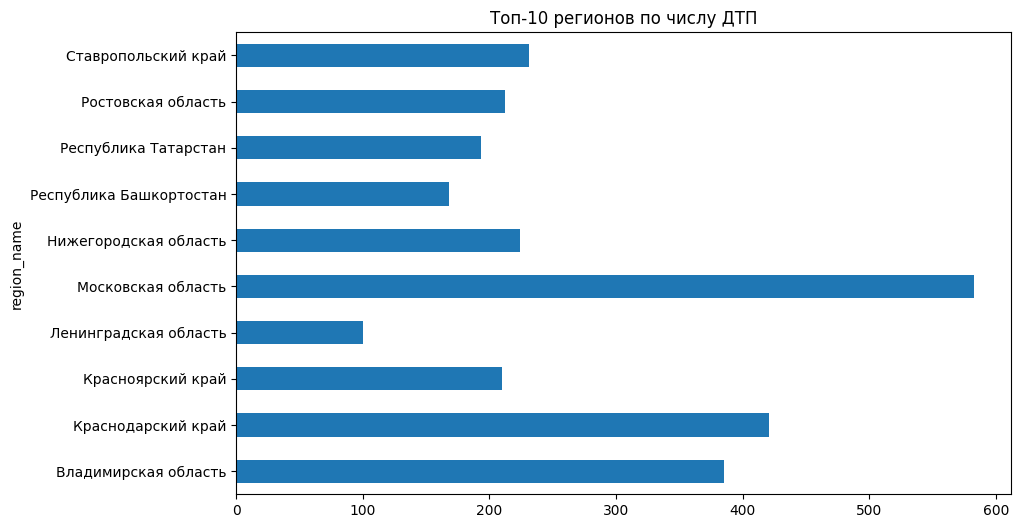

In [48]:
top_10_roads = data.query('road_code != "отсутствует"').groupby('road_code')['reg_code'].nunique().sort_values(ascending=False).head(10).index.tolist()
top_10_regions = data.groupby('reg_code')['participants_amount'].sum().sort_values(ascending=False).head(10).index.tolist()
filtered_data = data[data['road_code'].isin(top_10_roads) & data['reg_code'].isin(top_10_regions)]

grouped_data = filtered_data.groupby(['region_name'])['participants_amount'].count()

grouped_data.tail(10).plot(kind= 'barh',
                        figsize= (10, 6),
                        title='Топ-10 регионов по числу ДТП',
                        legend=False
                       )
plt.show()